In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

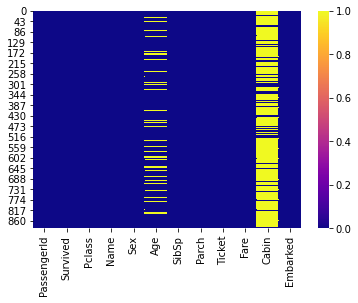

In [5]:
sns.heatmap(df.isnull(),cbar=True,cmap='plasma')

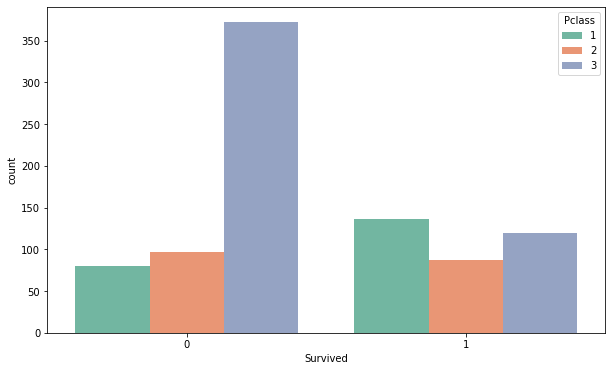

In [6]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x=df['Survived'],hue=df['Pclass'],palette='Set2')

In [7]:
def fill(data,col1,col2):
    for j in list(data[col1].unique()):
        pc_mean=data[(data[col1]==j) & (data[col2].notnull()) ][col2].mean()
        data[(data[col1]==j) & (data[col2].isnull()) ]=data[(data[col1]==j) & (data[col2].isnull()) ].fillna({col2:pc_mean})
    return data

In [8]:
df=fill(df,'Pclass','Age')

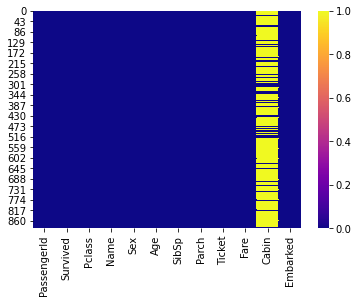

In [9]:
sns.heatmap(df.isnull(),cbar=True,cmap='plasma')

In [10]:
sex=pd.get_dummies(df['Sex']).drop(columns='female')
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [11]:
df=pd.concat([df,Embarked,sex],axis=1)

In [12]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0


In [13]:
y=df['Survived']
df_train=df.drop(['Name','Ticket','Sex','Embarked','Cabin','PassengerId','Survived'],axis=1)

In [14]:
df_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0


In [15]:
from sklearn.model_selection import train_test_split
[x_train,x_test,y_train,y_test]=train_test_split(df_train,y, test_size=0.25, random_state=101)

In [16]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=500)

In [17]:
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_predict=logistic.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print (classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       143
           1       0.66      0.79      0.72        80

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223



In [20]:
logistic.score(x_test,y_test)

0.7757847533632287

In [21]:
df_test=pd.read_csv('test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [22]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

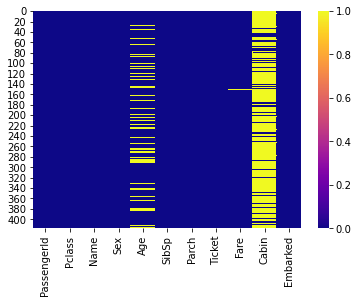

In [23]:
sns.heatmap(df_test.isnull(),cbar=True,cmap='plasma')

In [24]:
df_test=fill(df_test,'Pclass','Fare')
df_test=fill(df_test,'Pclass','Age')

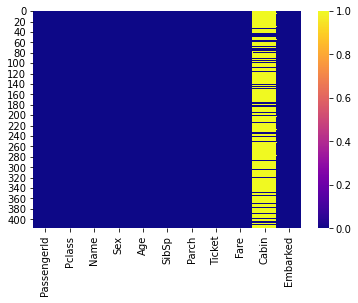

In [25]:
sns.heatmap(df_test.isnull(),cbar=True,cmap='plasma')

In [26]:
sex=pd.get_dummies(df_test['Sex']).drop(columns='female')
Embarked=pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test=pd.concat([df_test,Embarked,sex],axis=1)
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1


In [27]:
x_test=df_test.drop(['Name','Ticket','Sex','Embarked','Cabin','PassengerId'],axis=1)

In [28]:
y_predict=logistic.predict(x_test)

In [29]:
test_data=pd.merge(x_test,pd.DataFrame(y_predict, columns=['Survived_pred']), left_index=True, right_index=True)
test_data.head(10)

,Pclass,Age,SibSp,Parch,Fare,Q,S,male,Survived_pred
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,1,0,0
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,1,0
4,3,22.0,1,1,12.2875,0,1,0,1
5,3,14.0,0,0,9.2250,0,1,1,0
6,3,30.0,0,0,7.6292,1,0,0,1
7,2,26.0,1,1,29.0000,0,1,1,0
8,3,18.0,0,0,7.2292,0,0,0,1
9,3,21.0,2,0,24.1500,0,1,1,0


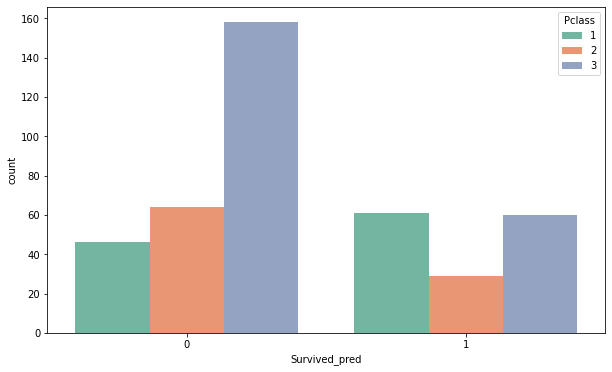

In [30]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x=test_data['Survived_pred'],hue=test_data['Pclass'],palette='Set2')